<a href="https://colab.research.google.com/github/rajeshmore1/DataScience_Mentorship/blob/main/ML_30_Density_based_clustering_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN ( density-based spatial clustering of applications with noise )

Clustering is a way to group a set of data points in a way that similar data points are grouped together. Therefore, clustering algorithms look for similarities or dissimilarities among data points. Clustering is an unsupervised learning method so there is no label associated with data points. The algorithm tries to find the underlying structure of the data.

There are different approaches and algorithms to perform clustering tasks which can be divided into three sub-categories:

* Partition-based clustering: E.g. k-means, k-median
* Hierarchical clustering: E.g. Agglomerative, Divisive
* Density-based clustering: E.g. DBSCAN

# Density-based clustering
Partition-based and hierarchical clustering techniques are highly efficient with normal shaped clusters. However, when it comes to arbitrary shaped clusters or detecting outliers, density-based techniques are more efficient.

For example, the dataset in the figure below can easily be divided into three clusters using k-means algoritm.

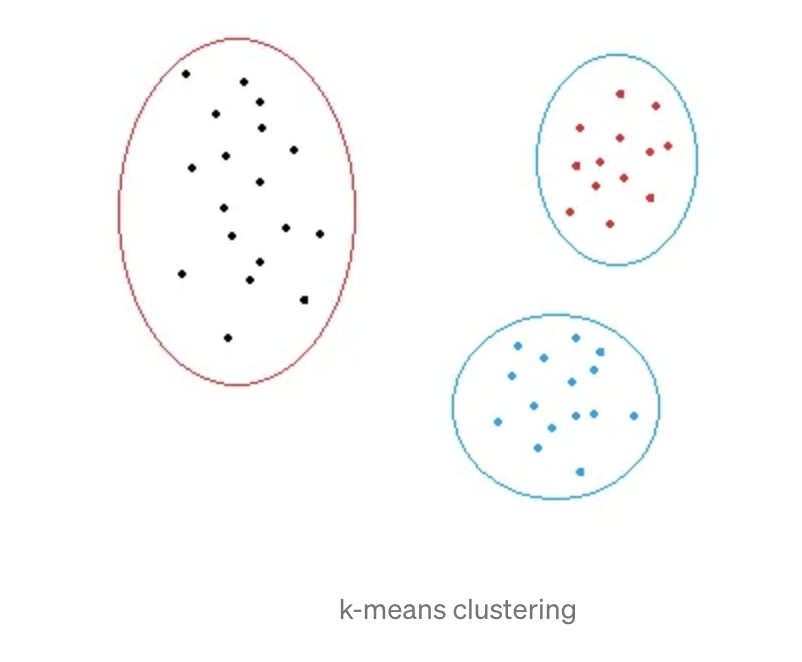

Consider the following figures:



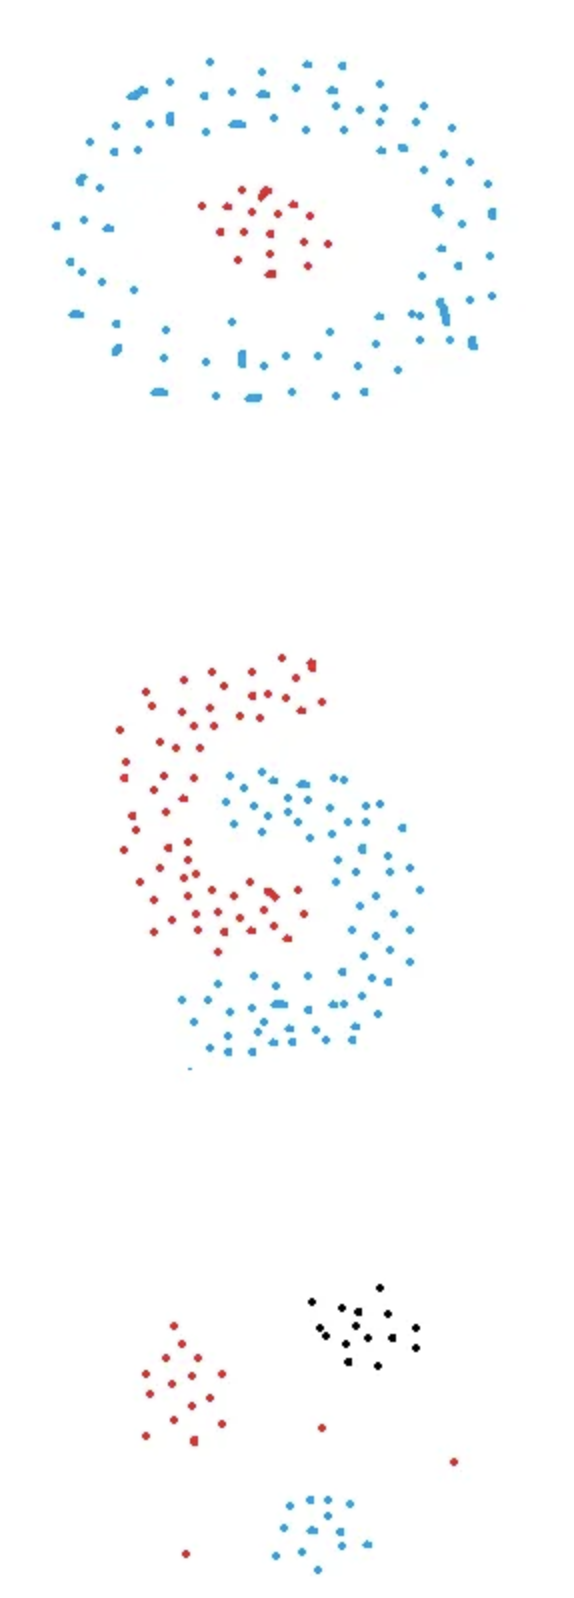

# DBSCAN algorithm
DBSCAN stands for density-based spatial clustering of applications with noise. It is able to find arbitrary shaped clusters and clusters with noise (i.e. outliers).

The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster.

There are two key parameters of DBSCAN:

1. eps(epsilon): The distance that specifies the neighborhoods. Two points are considered to be neighbors if the distance between them are less than or equal to eps.
2. minPts: Minimum number of data points to define a cluster.

Based on these two parameters, points are classified as core point, border point, or outlier:

* **Core point:** A point is a core point if there are at least minPts number of points (including the point itself) in its surrounding area with radius eps.
* **Border point:** A point is a border point if it is reachable from a core point and there are less than minPts number of points within its surrounding area.
* **Outlier:** A point is an outlier if it is not a core point and not reachable from any core points.

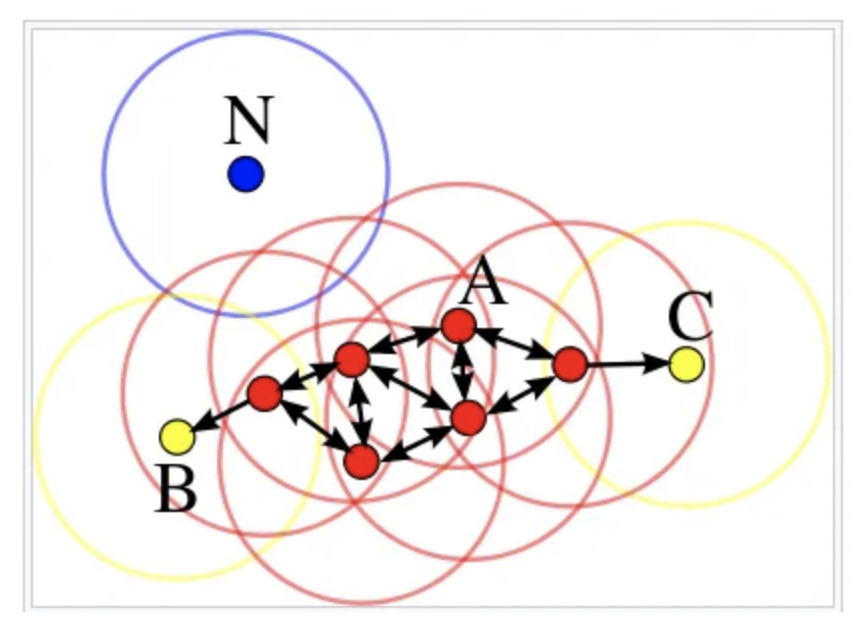

In this case, minPts is 4. Red points are core points because there are at least 4 points within their surrounding area with radius eps. This area is shown with the circles in the figure. The yellow points are border points because they are reachable from a core point and have less than 4 points within their neighborhood. Reachable means being in the surrounding area of a core point. The points B and C have two points (including the point itself) within their neigborhood (i.e. the surrounding area with a radius of eps). Finally N is an outlier because it is not a core point and cannot be reached from a core point.

We have learned the definitions of parameters and different type points. Now we can talk about how the algoritm works. It is actually quite simple:

1. minPts and eps are determined.
2. A starting point is selected at random at it’s neighborhood area is determined using radius eps. If there are at least minPts number of points in the neighborhood, the point is marked as core point and a cluster formation starts. If not, the point is marked as noise. Once a cluster formation starts (let’s say cluster A), all the points within the neighborhood of initial point become a part of cluster A. If these new points are also core points, the points that are in the neighborhood of them are also added to cluster A.

### Note: A point that is marked as noise may be revisited and be part of a cluster.

3. Next step is to randomly choose another point among the points that have not been visited in the previous steps. Then same procedure applies.
4. This process is finished when all points are visited.

### The distance between points is determined using a distance measurement method as in k-means algorithm. The most commonly used method is euclidean distance.

By applying these steps, DBSCAN algorithm is able to find high density regions and separate them from low density regions.

A cluster includes core points that are neighbors (i.e. reachable from one another) and all the border points of these core points. The required condition to form a cluster is to have at least one core point. Although very unlikely, we may have a cluster with only one core point and its border points.



# Scikit-learn implementation
We start with creating a sample dataset using datasets module of scikit-learn. After creating the sample data points, we will normalize the values using StandardScaler class from preprocessing module of scikit-learn.

Note: It is important to normalize values because it makes it easier to find an appropriate distance for radius of neighborhood (eps).

Let’s first import the libraries:



In [11]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

We will create a dataset with 3 clusters with 0.5 standard deviation for each cluster. Number of samples is 400 and we also choose three points as centroids (center of clusters). You can adjust these parameters however you like using make_blobs function.

In [12]:
#Determine centroids
centers = [[0.5, 2], [-1, -1], [1.5, -1]]
#Create dataset
X, y = make_blobs(n_samples=400, centers=centers, 
                  cluster_std=0.5, random_state=0)
#Normalize the values
X = StandardScaler().fit_transform(X)

In [13]:
X.shape

(400, 2)

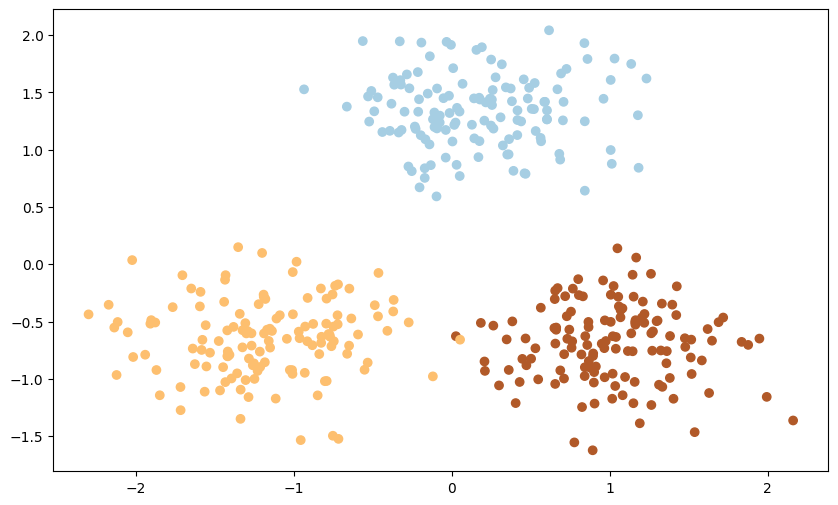

In [14]:
# We can also plot the dataset to see how each cluster looks:

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')

In [15]:
#We can now create a DBSCAN object and fit the data:

from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=20)
db.fit(X)

DBSCAN(eps=0.4, min_samples=20)

We just need to define eps and minPts values using eps and min_samples parameters.

### Note: We do not have to specify the number of clusters for DBSCAN which is a great advantage of DBSCAN over k-means clustering.

Let’s visualize the clusters determined by DBSCAN:

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

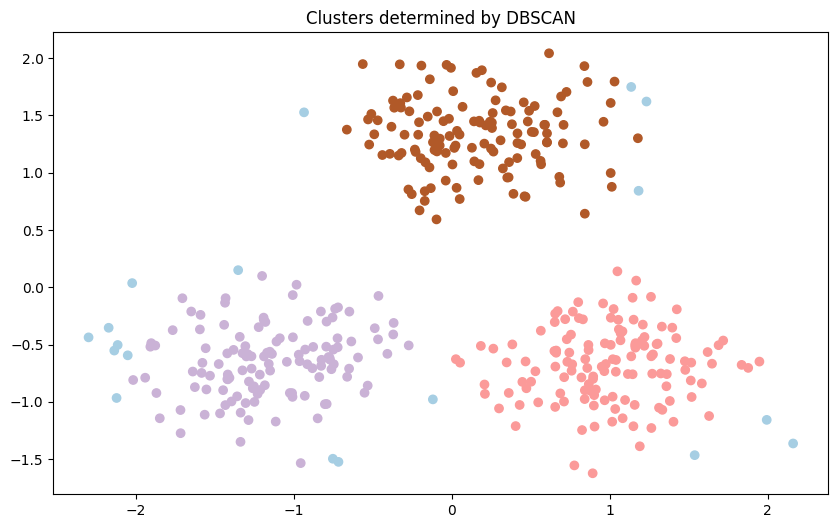

In [16]:
y_pred = db.fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

It was able to detect the outliers (marked with blue). We can access the labels of data points using labels_ attribute. Noise (or outliers) are given -1 label. Let’s check the number of outliers:

In [17]:
db.labels_[db.labels_ == -1].size


18

In [19]:
y_pred

array([ 0,  0,  1,  2,  2,  1,  1,  2,  0,  1,  0,  0,  2,  1,  0,  1,  1,
        2,  2,  2,  2,  0,  0,  0,  0,  2,  1,  2,  1, -1,  0,  1,  0,  0,
        0,  0,  0,  0,  1,  2,  2,  0,  2,  1,  0,  2,  2,  2,  0,  1, -1,
        2,  2,  1,  0,  1,  2,  2, -1,  2,  2,  1,  1,  2,  2,  1,  0,  1,
        2,  0,  1,  1,  2,  1,  0,  1,  2,  1,  0,  0,  2,  2,  1,  0,  2,
        1,  0,  1,  0,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  2,  0,
        2,  1,  1,  2,  1,  2,  2,  0,  1,  1,  0,  1,  0,  0,  2,  0,  0,
        2,  0,  1,  2,  2,  1,  0,  1,  2,  0,  1,  1,  2,  1,  2,  1,  0,
        0,  2,  0,  0,  2,  1,  1,  1,  2, -1,  0,  0,  1,  0,  1,  1,  1,
        0,  0,  1,  1, -1,  2,  1,  2,  0,  2,  1,  0,  0,  1, -1, -1,  2,
        1,  2,  2,  0,  1,  0,  0,  1,  2,  2,  1,  2,  1,  0,  2,  1,  0,
        2,  0,  2,  2,  1,  1,  0,  2,  2,  1,  2,  0,  1,  2,  0, -1,  1,
        1,  2,  1,  2,  1, -1,  2,  0,  2,  0,  2,  1,  0,  2,  0, -1,  0,
       -1,  2,  0,  2,  1

The clusters in this sample dataset do not have actually have arbitrary shapes. But DBSCAN performed really good at detecting outliers which would not be easy with partition-based (e.g. k-means) or hierarchical (e.g. agglomerative) clustering techniques. If you also apply DBSCAN to a dataset with arbitrary shaped clusters, you will see the success of DBSCAN as well.



# Pros and Cons of DBSCAN
## Pros:

Does not require to specify number of clusters beforehand.

Performs well with arbitrary shapes clusters.

DBSCAN is robust to outliers and able to detect the outliers.
## Cons:

In some cases, determining an appropriate distance of neighborhood (eps) is not easy and it requires domain knowledge.

If clusters are very different in terms of in-cluster densities, DBSCAN is not well suited to define clusters. 

The characteristics of clusters are defined by the combination of eps-minPts parameters. 

Since we pass in one eps-minPts combination to the algorithm, it cannot generalize well to clusters with much different densities.

 Extra Reference: https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html

Evaluation Metrics: https://towardsdatascience.com/v-measure-an-homogeneous-and-complete-clustering-ab5b1823d0ad
